In [1]:
import numpy as np
import pandas as pd
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns

# Model of Drop Error

In [2]:
X = []
for i in range(1000):
    Y1 = normal(0, 57)
    Y2 = normal(0, 57)
    X.append(np.sqrt(Y1**2 + Y2**2))
X.sort()

def drop_test_pdf(x):
    a = 1/57
    return (a**2)*x*np.exp(-(1/2)*(a**2)*(x**2))

def drop_test_cdf(x):
    a = 1/57
    return 1-np.exp(-(1/2)*(a**2)*(x**2))

pdf = [drop_test_pdf(x) for x in X]
cdf = [drop_test_cdf(x) for x in X]

# 3. Model Analysis

### 1. Graph of PDF of Drop Error

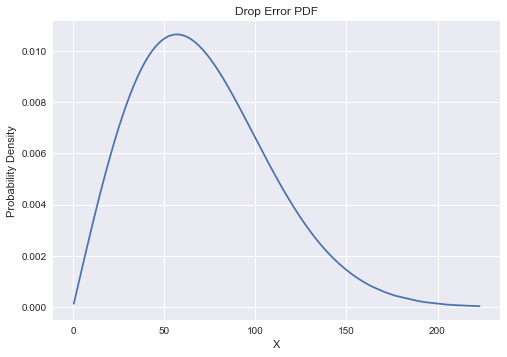

In [3]:
plt.plot(X, pdf)
plt.title("Drop Error PDF")
plt.ylabel('Probability Density')
plt.xlabel('X')
plt.show()

### 2. Graph of CDF of Drop Error

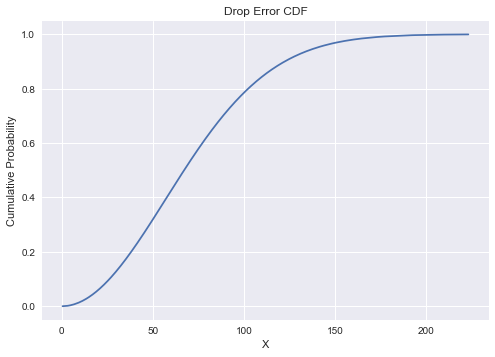

In [4]:
plt.plot(X, cdf)
plt.title("Drop Error CDF")
plt.ylabel('Cumulative Probability')
plt.xlabel('X')
plt.show()

### 3. Circles Graph

In [5]:
ser = pd.Series(X)
ser.describe(percentiles=[.5,.7,.9])

count    1000.000000
mean       70.205282
std        36.811092
min         0.420017
50%        66.883187
70%        87.509777
90%       119.480416
max       223.095021
dtype: float64

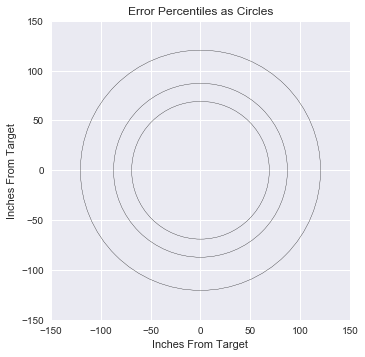

In [6]:
circle1 = plt.Circle((0, 0), 69.087714, fill = False)
circle2 = plt.Circle((0, 0), 87.246256, fill = False)
circle3 = plt.Circle((0, 0), 120.527915, fill = False)

fig, ax = plt.subplots()

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

plt.title('Error Percentiles as Circles')
plt.xlabel('Inches From Target')
plt.ylabel('Inches From Target')
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 4. Explain

These circles show where certain percentages of the drops land: 50% of the drops land within the inner circle, 70% of the drops land within the middle circle, and 90% of the drops land within the outer circle.

# 4. LAWS OF LARGE NUMBERS

### OBJECTIVE 2

* 𝑛 − sample size
* 𝑀𝑛 − estimator of 𝜇𝑋
* 𝑚𝑛 − estimate of 𝜇𝑋

(𝑀𝑛 is a random variable, 𝑚𝑛 is a realization of 𝑀𝑛 − a number.)

#### Weak Law of Large Numbers

In [7]:
muX = (1/(1/57))*np.sqrt(np.pi/2)

X2 = []
for i in range(7000):
    Y1 = normal(0, 57)
    Y2 = normal(0, 57)
    X2.append(np.sqrt(Y1**2 + Y2**2))
    
cumulative_mean = []
for i in range(1, len(X2)):
    var = X2[:i]
    cumulative_mean.append(np.mean(var))

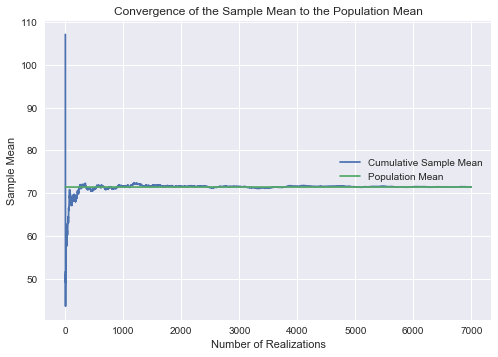

In [8]:
plt.plot(range(6999), cumulative_mean)
plt.plot(range(6999), [muX for i in range(6999)])

plt.title('Convergence of the Sample Mean to the Population Mean')
plt.legend(['Cumulative Sample Mean', 'Population Mean'], loc = 7)
plt.ylabel('Sample Mean')
plt.xlabel('Number of Realizations')
plt.show()

#### Strong Law of Large Numbers

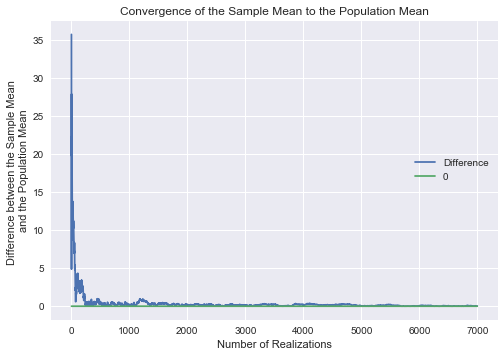

In [9]:
difference = []
for mean in cumulative_mean:
    difference.append(abs(mean - muX))

plt.plot(range(6999), difference)
plt.plot(range(6999), [0 for i in range(6999)])

plt.title('Convergence of the Sample Mean to the Population Mean')
plt.legend(['Difference', '0'], loc = 7)
plt.ylabel('Difference between the Sample Mean \nand the Population Mean')
plt.xlabel('Number of Realizations')
plt.show()

The difference between the sample mean and the population mean converges ot zero as n goes to infinity. This means that the sample mean converges to the population mean almost surely.

# 4.2 Experiment

### Random Number generator

In [10]:
seed = 1000

def lcrng(x0 = seed, a = 24693, c = 1753, K = 2**17):
    temp_u = []
    for i in range(K):
        x0 = ((a*x0) + c) % K
        temp_u.append(x0/K)
    
    global seed
    seed += 1
    
    return temp_u
        

u = lcrng()

print('u51 = ', str(round(u[50], 4)))
print('u52 = ', str(round(u[51], 4)))
print('u53 = ', str(round(u[52], 4)))

u51 =  0.6932
u52 =  0.9337
u53 =  0.0117


### 3. Calculate

means = []
ns = []
for n in [5, 10, 30, 50, 100, 150, 250, 500]:
    for i in range(110):
        X = []
        for j in range(n):
            Y1 = normal(0, 57)
            Y2 = normal(0, 57)
            X.append(np.sqrt(Y1**2 + Y2**2))
        means.append(np.mean(X))
        ns.append(n)

### 4. Make a Graph

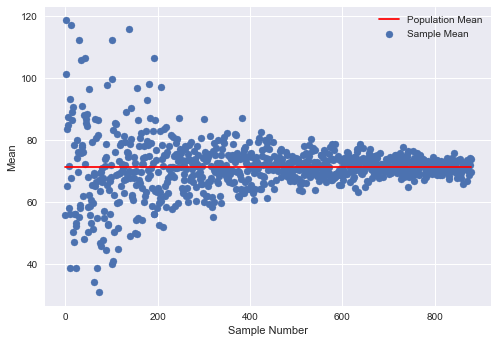

In [12]:
plt.scatter(range(880), means)
plt.plot(range(880), [muX for i in range(880)], color = 'red')


plt.legend(['Population Mean', 'Sample Mean'], loc = 1)
plt.ylabel('Mean')
plt.xlabel('Sample Number')
plt.show()

### 5. Interperet

This graph shows how the sample mean converges to the population mean as the number of realizations in the sample increases. This demonstrates the Strong Law of Large Numbers as it shows that the probability of the sample mean being equal to the population mean as n approaches infinity is almost surely 1.

### 6. Recommend

In [14]:
pvals = []
for i in X2:
    pvals.append(stats.ttest_1samp(a = X2[:i], 
                  popmean = muX)[1])

NameError: name 'stats' is not defined

In [167]:
pvals = []
for i in range(1, len(X2)):
    var = X2[:i]
    pvals.append(stats.ttest_1samp(a= var, popmean= muX)[1])


/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [170]:
pvals[-1]

0.81271968863271304

In [179]:
difference[-461]

0.098614664182349543